<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2_8)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.8_n20.csv',
 'data_multi_delta_2.8_n30.csv',
 'data_multi_delta_2.8_n60.csv',
 'data_multi_delta_2.8_n120.csv',
 'data_multi_delta_2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,101.644254,274.306532,178.788321,95.518211
1,0.0,1.0,44.810190,46.967683,81.913998,132.184945,315.876815,134.154266,181.722548
2,0.0,2.0,89.719961,65.800482,63.419557,336.372023,565.312023,203.549594,361.762429
3,0.0,3.0,99.969317,45.799765,35.667810,154.519796,345.956688,186.231764,159.724924
4,0.0,4.0,33.611377,56.777825,62.400649,47.339984,210.129835,26.212237,183.917598
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,344.319339,517.305557,262.291752,255.013804
59996,999.0,56.0,70.765481,74.589813,42.649245,-263.574413,-65.569875,190.223063,-255.792938
59997,999.0,57.0,88.257994,25.363246,45.498839,197.510434,366.630513,113.978734,252.651779
59998,999.0,58.0,79.065187,78.384294,96.039341,548.115842,811.604664,103.531616,708.073048


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,101.644254,274.306532,178.788321,95.518211
1,0.0,1.0,44.810190,46.967683,81.913998,132.184945,315.876815,134.154266,181.722548
2,0.0,2.0,89.719961,65.800482,63.419557,336.372023,565.312023,203.549594,361.762429
3,0.0,3.0,99.969317,45.799765,35.667810,154.519796,345.956688,186.231764,159.724924
4,0.0,4.0,33.611377,56.777825,62.400649,47.339984,210.129835,26.212237,183.917598
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,344.319339,517.305557,262.291752,255.013804
59996,999.0,56.0,70.765481,74.589813,42.649245,-263.574413,-65.569875,190.223063,-255.792938
59997,999.0,57.0,88.257994,25.363246,45.498839,197.510434,366.630513,113.978734,252.651779
59998,999.0,58.0,79.065187,78.384294,96.039341,548.115842,811.604664,103.531616,708.073048


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    42.180882  29.019275  ...  178.788321   95.518211
      1.0    44.810190  46.967683  ...  134.154266  181.722548
      2.0    89.719961  65.800482  ...  203.549594  361.762429
      3.0    99.969317  45.799765  ...  186.231764  159.724924
      4.0    33.611377  56.777825  ...   26.212237  183.917598
...                ...        ...  ...         ...         ...
999.0 55.0   53.113612  88.414639  ...  262.291752  255.013804
      56.0   70.765481  74.589813  ...  190.223063 -255.792938
      57.0   88.257994  25.363246  ...  113.978734  252.651779
      58.0   79.065187  78.384294  ...  103.531616  708.073048
      59.0   50.245971  32.716929  ...  149.433533   57.920171

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    42.180882  29.019275  ...  178.788321   95.518211
      1.0    44.810190  46.967683  ...  134.154266  181.722548
      2.0    89.719961  65.800482  ...  203.549594  361.762429
      3.0    99.969317  45.799765  ...  186.231764  159.724924
      4.0    33.611377  56.777825  ...   26.212237  183.917598
...                ...        ...  ...         ...         ...
999.0 55.0   53.113612  88.414639  ...  262.291752  255.013804
      56.0   70.765481  74.589813  ...  190.223063 -255.792938
      57.0   88.257994  25.363246  ...  113.978734  252.651779
      58.0   79.065187  78.384294  ...  103.531616  708.073048
      59.0   50.245971  32.716929  ...  149.433533   57.920171

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,42.180882,29.019275,91.462121,101.644254,274.306532,178.788321,95.518211
1,0.0,1.0,44.810190,46.967683,81.913998,132.184945,315.876815,134.154266,181.722548
2,0.0,2.0,89.719961,65.800482,63.419557,336.372023,565.312023,203.549594,361.762429
3,0.0,3.0,99.969317,45.799765,35.667810,154.519796,345.956688,186.231764,159.724924
4,0.0,4.0,33.611377,56.777825,62.400649,47.339984,210.129835,26.212237,183.917598
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,53.113612,88.414639,21.457966,344.319339,517.305557,262.291752,255.013804
59996,999.0,56.0,70.765481,74.589813,42.649245,-263.574413,-65.569875,190.223063,-255.792938
59997,999.0,57.0,88.257994,25.363246,45.498839,197.510434,366.630513,113.978734,252.651779
59998,999.0,58.0,79.065187,78.384294,96.039341,548.115842,811.604664,103.531616,708.073048


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    42.180882  29.019275  ...  178.788321   95.518211
      1.0    44.810190  46.967683  ...  134.154266  181.722548
      2.0    89.719961  65.800482  ...  203.549594  361.762429
      3.0    99.969317  45.799765  ...  186.231764  159.724924
      4.0    33.611377  56.777825  ...   26.212237  183.917598
...                ...        ...  ...         ...         ...
999.0 55.0   53.113612  88.414639  ...  262.291752  255.013804
      56.0   70.765481  74.589813  ...  190.223063 -255.792938
      57.0   88.257994  25.363246  ...  113.978734  252.651779
      58.0   79.065187  78.384294  ...  103.531616  708.073048
      59.0   50.245971  32.716929  ...  149.433533   57.920171

[60000 rows x 7 columns]

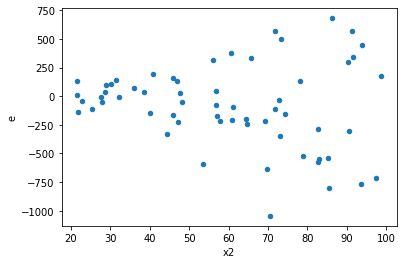

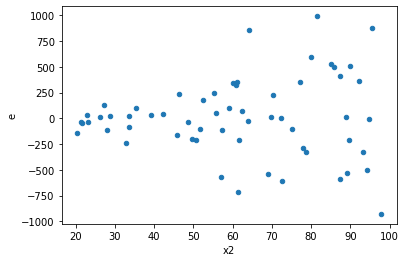

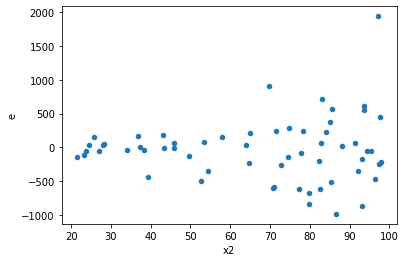

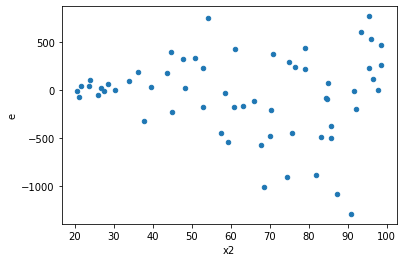

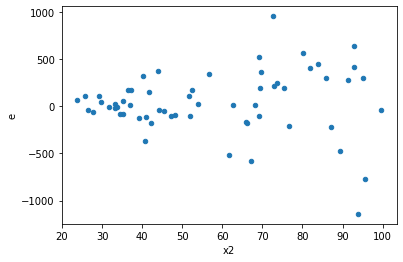

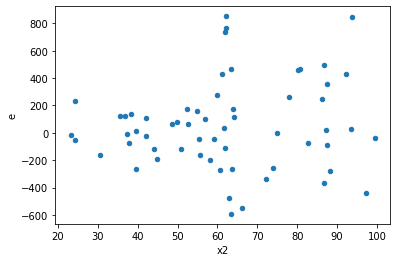

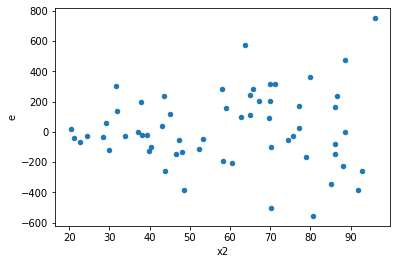

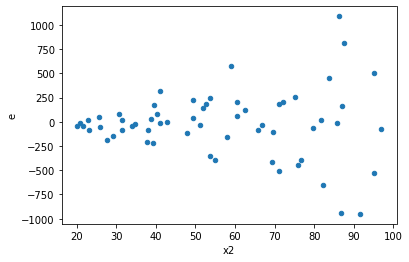

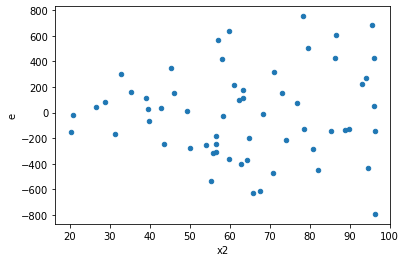

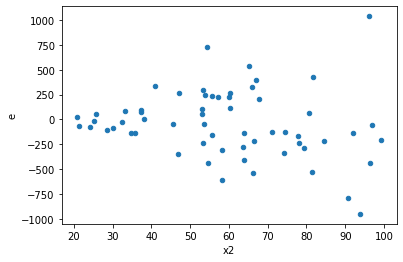

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,5828138.775903893,524859.3934459414,291406.9387951946,26242.96967229707,11.10419066264491,7.308015741447349e-07,0.9999996345992129,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,5014655.068632948,369537.73884947586,250732.7534316474,18476.886942473793,13.570075641653402,1.1872760286024686e-07,0.9999999406361986,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,8691825.319762316,672597.7341757931,434591.2659881158,33629.88670878966,12.922769254364724,1.8578067062513526e-07,0.9999999071096647,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,5070173.50062412,1199189.7903574028,253508.67503120602,59959.48951787014,4.227999221968878,0.0016953831851178602,0.9991523084074411,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,4718772.071108968,530858.2008367691,235938.6035554484,26542.910041838455,8.88895012579813,5.128168693913082e-06,0.999997435915653,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,2839480.1692939703,324574.0484603033,141974.0084646985,16228.702423015164,8.748327793807736,5.87842705468411e-06,0.9999970607864727,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,2021316.0699963344,471952.5724997882,101065.80349981671,23597.62862498941,4.282879653118623,0.0015507515100170455,0.9992246242449915,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,4440675.792158088,284771.1546854563,222033.7896079044,14238.557734272816,15.59383989246745,3.271998649800878e-08,0.9999999836400068,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,3519726.1056255186,1270809.273179289,175986.30528127594,63540.46365896445,2.7696729791874497,0.02382088174575636,0.9880895591271218,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,5828138.775903893,524859.3934459414,291406.9387951946,26242.96967229707,11.10419066264491,7.308015741447349e-07,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,5014655.068632948,369537.73884947586,250732.7534316474,18476.886942473793,13.570075641653402,1.1872760286024686e-07,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,8691825.319762316,672597.7341757931,434591.2659881158,33629.88670878966,12.922769254364724,1.8578067062513526e-07,Reject001=0 : Heteroscedasticity
3.0,21.0,21.0,5070173.50062412,1199189.7903574028,253508.67503120602,59959.48951787014,4.227999221968878,0.0016953831851178602,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,4718772.071108968,530858.2008367691,235938.6035554484,26542.910041838455,8.88895012579813,5.128168693913082e-06,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,2839480.1692939703,324574.0484603033,141974.0084646985,16228.702423015164,8.748327793807736,5.87842705468411e-06,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,2021316.0699963344,471952.5724997882,101065.80349981671,23597.62862498941,4.282879653118623,0.0015507515100170455,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,4440675.792158088,284771.1546854563,222033.7896079044,14238.557734272816,15.59383989246745,3.271998649800878e-08,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,3519726.1056255186,1270809.273179289,175986.30528127594,63540.46365896445,2.7696729791874497,0.02382088174575636,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    983
Reject001=1 : Homoscedasticity       17
Name: Result_test, dtype: int64